# Utilisation de over sampling

<>:13: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:13: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\taqis\AppData\Local\Temp\ipykernel_7288\826756270.py:13: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df = pd.read_csv("..\data\data_train_set.csv", sep=";", decimal=",")


Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\taqis\Documents\GitHub\projet-de-classification-isFraud\Projet classification\fraudenv\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


 Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best CV F1: 0.9989586705668686

 Classification report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160002
           1       0.98      0.98      0.98      1312

    accuracy                           1.00    161314
   macro avg       0.99      0.99      0.99    161314
weighted avg       1.00      1.00      1.00    161314

 F1-score : 0.9801526717557252
recall: 0.9786585365853658


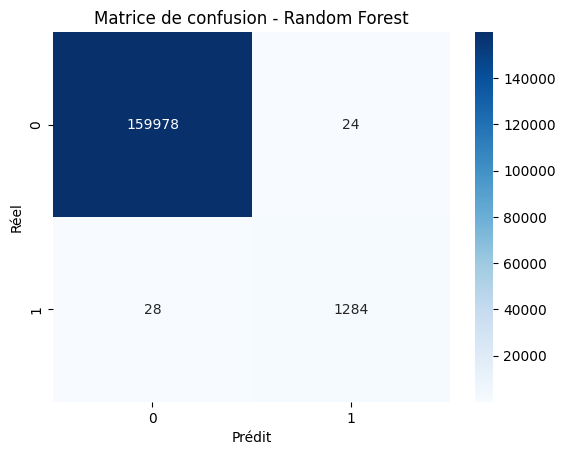

In [9]:
import pandas as pd
# import joblib
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE


#  CHARGEMENT DES DONNÉES

df = pd.read_csv("..\data\data_train_set.csv", sep=";", decimal=",")


# NETTOYAGE

def nettoyage(table):
    dft = table.drop(["nameOrig", "nameDest"], axis=1).copy()
    cols = ["oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
    dft[cols] = dft[cols].astype(float)
    return dft

data = nettoyage(df)


#  ENCODAGE

data = pd.get_dummies(data, columns=["type"], drop_first=True)
data = data.replace({True: 1, False: 0})


#  SPLIT

X = data.drop("isFraud", axis=1)
y = data["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


#  SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


#  RANDOM FOREST + GRIDSEARCH

param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
}

clf = RandomForestClassifier(random_state=42, n_jobs=1)

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_smote, y_train_smote)

best_model = grid_search.best_estimator_

print(" Best parameters:", grid_search.best_params_)
print("Best CV F1:", grid_search.best_score_)

#  ÉVALUATION

y_pred = best_model.predict(X_test)
print("\n Classification report :\n")
print(classification_report(y_test, y_pred))
print(" F1-score :", f1_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")
plt.show()

# SAUVEGARDE (POUR FLASK)

# os.makedirs("model_test", exist_ok=True)

# joblib.dump(
#     {
#         "model": best_model,
#         "columns": X.columns.tolist()
#     },
#     "model_test/fraud_model.joblib"
# )

# print(" Modèle et colonnes sauvegardés avec succès")

# utilisation de under sampling 


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max

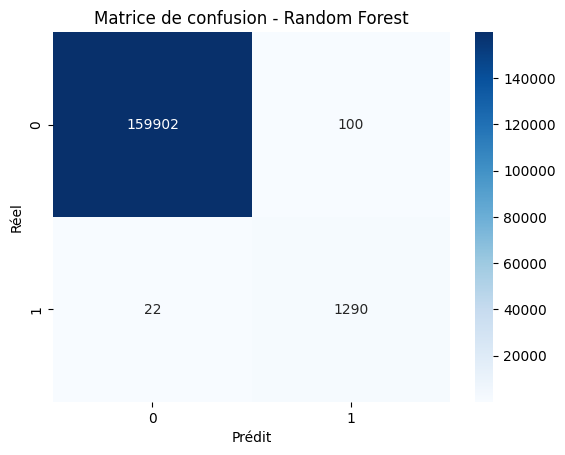


 Modèle sauvegardé dans : model_test/fraud_model.joblib


In [1]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, recall_score,  confusion_matrix

from imblearn.under_sampling import RandomUnderSampler



#  CHARGEMENT DES DONNÉES

df = pd.read_csv("../data/data_train_set.csv", sep=";", decimal=",")



# NETTOYAGE DES DONNÉES

def nettoyage(table):
    dft = table.drop(["nameOrig", "nameDest"], axis=1).copy()

    cols = [
        "oldbalanceOrg",
        "newbalanceOrig",
        "oldbalanceDest",
        "newbalanceDest"
    ]
    dft[cols] = dft[cols].astype(float)

    return dft


data = nettoyage(df)


data = pd.get_dummies(data, columns=["type"], drop_first=True)

# Bool → int
data = data.replace({True: 1, False: 0})



#  SPLIT TRAIN / TEST

X = data.drop("isFraud", axis=1)
y = data["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



#  UNDER-SAMPLING
rus = RandomUnderSampler(
    sampling_strategy=0.5,
    random_state=42
)

X_train_under, y_train_under = rus.fit_resample(X_train, y_train)


# RANDOM FOREST + GRIDSEARCH

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=1
)

param_grid = {
    "n_estimators": [100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="f1",
    cv=3,
    verbose=2,
    n_jobs=1
)

grid_search.fit(X_train_under, y_train_under)



#  ÉVALUATION

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print(" Meilleurs paramètres :", grid_search.best_params_)
print("\n Rapport de classification :\n")
print(classification_report(y_test, y_pred))
print(" F1-score :", f1_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Random Forest")
plt.show()


#  SAUVEGARDE DU MODÈLE

joblib.dump(best_model,r"..\model_test\fraud_model.pkl")
print("\n Modèle sauvegardé dans : model_test/fraud_model.joblib")
